In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load dataset
X, y = fetch_covtype(return_X_y=True)

# create dataframe
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

# Making a DataFrame
covtype_df = pd.DataFrame(X, columns=feature_names)
covtype_df['Cover_Type'] = y

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#set y values to 0-7
y_train = y_train - 1
y_test = y_test - 1

In [2]:
#FFNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam

#define RELU function as the activation function for the hidden layers
#use softmax function for the output layer
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

#compile the model
optimizer = Adam(learning_rate=10e-4)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

2023-12-17 17:12:36.076506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 17:12:39.314505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#fit the model
model_fitting = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    verbose=1, epochs=30)

Epoch 1/30
12710/12710 [==============================] - 11s 848us/step - loss: 3.4021 - accuracy: 0.5983 - val_loss: 1.0048 - val_accuracy: 0.6039
Epoch 2/30
12710/12710 [==============================] - 11s 828us/step - loss: 0.7349 - accuracy: 0.6893 - val_loss: 0.6980 - val_accuracy: 0.6907
Epoch 3/30
12710/12710 [==============================] - 12s 922us/step - loss: 0.6657 - accuracy: 0.7133 - val_loss: 0.6576 - val_accuracy: 0.7194
Epoch 4/30
12710/12710 [==============================] - 11s 851us/step - loss: 0.6346 - accuracy: 0.7269 - val_loss: 0.6134 - val_accuracy: 0.7374
Epoch 5/30
12710/12710 [==============================] - 10s 825us/step - loss: 0.6170 - accuracy: 0.7341 - val_loss: 0.5905 - val_accuracy: 0.7488
Epoch 6/30
12710/12710 [==============================] - 11s 840us/step - loss: 0.6059 - accuracy: 0.7398 - val_loss: 0.5805 - val_accuracy: 0.7561
Epoch 7/30
12710/12710 [==============================] - 11s 837us/step - loss: 0.5969 - accuracy: 0.7442

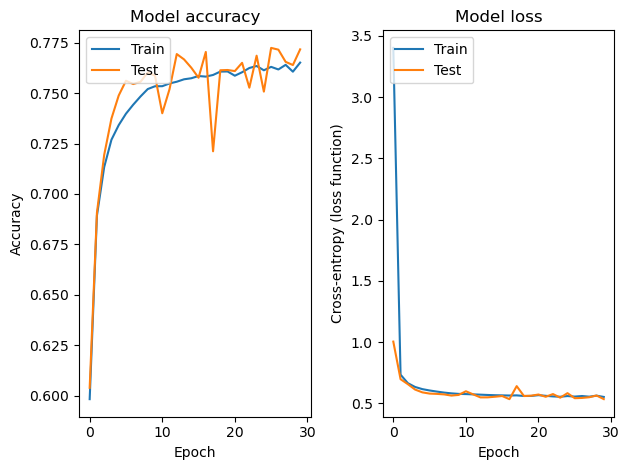

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(model_fitting.history['accuracy'])
plt.plot(model_fitting.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fitting.history['loss'])
plt.plot(model_fitting.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Cross-entropy (loss function)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

5447/5447 [==============================] - 2s 437us/step


/var/folders/_t/pzbtlqfs06q4gkr88b12hv9r0000gn/T/ipykernel_10614/326084004.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


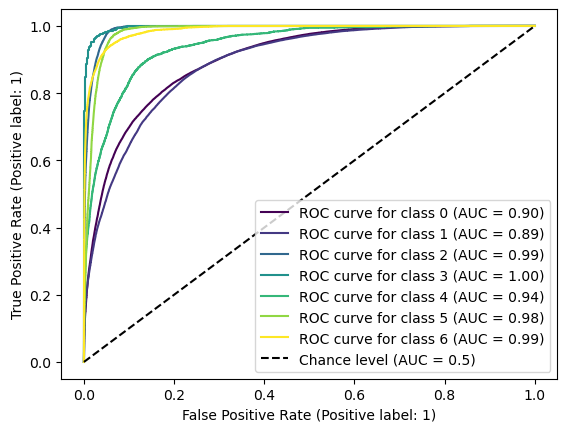

In [5]:
# modifying code the code found in the documentation of the Python library scikit-learn https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# plot of the ROC curve for each class against the others

from sklearn.metrics import RocCurveDisplay
from itertools import cycle
import matplotlib.cm as cm

y_predict = model.predict(X_test)
n_classes = (np.unique(y_test)).shape[0]
y_test_bin = keras.utils.to_categorical(y_test, n_classes)

fig, ax = plt.subplots()
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, n_classes)]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, class_id],
        y_predict[:, class_id],
        name=f"ROC curve for class {class_id}",
        color=color,
        ax = ax,
        plot_chance_level=(class_id == 6),
    )
plt.show()

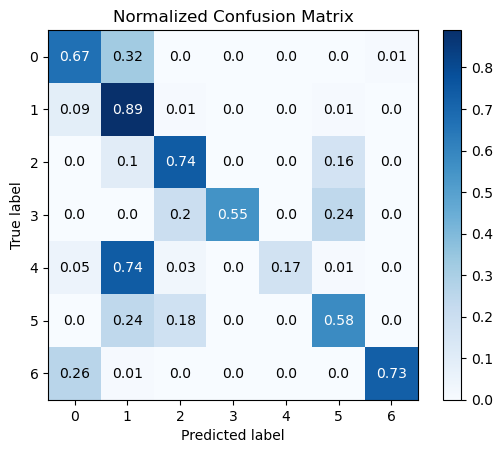

[[42653 20134     6     0    19    18   726]
 [ 8076 75551   693     0    89   467   202]
 [    3  1021  7898    36    13  1667     0]
 [    0     0   161   441     0   193     0]
 [  156  2169    89     0   493    34     0]
 [    1  1230   929    10     0  3057     0]
 [ 1570    86     0     0     0     0  4413]]


In [15]:
#using the code from the lecture of Applied Data and Machine Learning, Week45, Morten Hjorth-Jensen https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week45.html
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

y_pred_classes = np.argmax(y_predict, axis=1)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_classes, normalize=True)
plt.show()
confusion_matrix = confusion_matrix(y_test, y_pred_classes)

print(confusion_matrix)

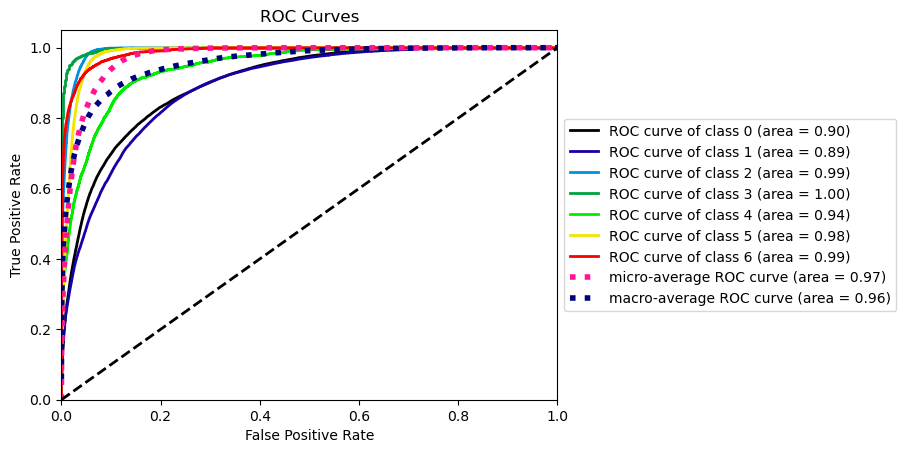

In [14]:
skplt.metrics.plot_roc(y_test, y_predict)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()